# csv 파일 어노멀리 값 보내기

In [22]:
import warnings
warnings.filterwarnings('ignore')

## 파일 넣고 빼기, 압축풀기 

import shutil
import zipfile
import os
import glob

## 기본 데이터 정리 라이브러리 

import pickle # dump variables
import numpy as np # linear algebra
import modin.pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
## pandas 멀티코어 버전, 빠르다! 
import datetime as dt # datetime lib

import seaborn as sns
import matplotlib.pyplot as plt

## LSTM 모델을 사용하기 위한 파이토치 기반 라이브러리 추가  

from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim


## Matplotlib 스타일 


In [4]:
# Matplotlib styles and plot again.
%matplotlib inline
plt.rcdefaults()

sns.set(rc={'figure.figsize': tuple(plt.rcParams['figure.figsize'])})
sns.set(style="whitegrid", font_scale=1.75)

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
plt.rcParams['figure.dpi'] = 200
sns.set_palette(sns.color_palette("muted"))

#
# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
#

## You can also just do this in Colab/Jupyter, some "magic":
%config InlineBackend.figure_format='retina'
# See https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## data input

In [5]:
## local setting 

%cd /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project

# CSV 파일들이 있는 디렉토리 경로
directory_path = '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/'

# 디렉토리 내의 모든 CSV 파일 경로를 가져오기
file_paths = glob.glob(directory_path + '/*.csv')

# 파일 경로를 순서대로 정렬
file_paths = sorted(file_paths)

# 파일들을 담을 빈 DataFrame 생성
combined_data = pd.DataFrame()

# acc 파일만 불러오기 (파일명에 'acc'가 포함된 파일들)
acc_file_paths = [file_path for file_path in file_paths if 'acc' in file_path]



/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project


In [6]:
acc_file_paths

['../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00001.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00002.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00003.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00004.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00005.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00006.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00007.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00008.csv',
 '../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/acc_00009.csv',
 '../Team-project/data/ieee-

In [12]:
import csv
def combine_csv_files(input_file_paths, output_file):
    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile, delimiter=',')
        for input_file_path in input_file_paths:
            with open(input_file_path, 'r', newline='') as infile:
                reader = csv.reader(infile, delimiter=',')
                for row in reader:
                    writer.writerow(row)

In [13]:
output_file = 'combined_csv_file.csv'

combine_csv_files(acc_file_paths, output_file)

In [30]:
combined_csv_df = pd.read_csv('../Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Full_Test_Set/Bearing1_6/'+output_file,header=None)

2023-08-01 16:07:37,579	INFO worker.py:1621 -- Started a local Ray instance.
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet)       exec(line)
(raylet)     File "<string>", line 1, in <module>
(raylet)     File "/home/i4624/.local/lib/python3.10/site-packages/pandas/__init__.py", line 16, in <module>
(raylet)       raise ImportError(
(raylet)   ImportError: Unable to import required dependencies:
(raylet)   pytz: No module named 'pytz'
(raylet) 
(raylet) Remainder of file ignored
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet)       exec(line)
(raylet)     File "<string>", line 1, in <mod

In [31]:
combined_csv_df

,0,1,2,3,4,5
0,9,2,51,775040.0,-0.070,-0.354
1,9,2,51,775080.0,-0.571,-0.036
2,9,2,51,775120.0,-0.660,0.413
3,9,2,51,775160.0,-0.498,-0.043
4,9,2,51,775200.0,-0.749,-0.354
...,...,...,...,...,...,...
6266875,15,50,41,874840.0,-0.147,3.539
6266876,15,50,41,874880.0,2.178,0.809
6266877,15,50,41,874920.0,-0.268,-3.877
6266878,15,50,41,874960.0,-1.258,-0.673


KeyError: (0, 1, 2, 3)

In [32]:
# Convert timestamp columns to integers and create a new DataFrame with these values
timestamp_integers = combined_csv_df[[0, 1, 2, 3]].astype(int)
timestamp_integers.columns = ['hour', 'minute', 'second', 'microsecond']

# Combine the integer values to form a string in the format 'HH:MM:SS.microseconds'
combined_csv_df['timestamp'] = timestamp_integers.apply(lambda x: f"{x['hour']:02d}:{x['minute']:02d}:{x['second']:02d}.{x['microsecond']:06d}", axis=1)

# Convert the 'timestamp' column to a Pandas datetime object
combined_csv_df['timestamp'] = pd.to_datetime(combined_csv_df['timestamp'], format='%H:%M:%S.%f')

(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):  Traceback (most recent call last):
(raylet) 
(raylet)   Traceback (most recent call last):    File "/usr/lib/python3.10/site.py", line 192, in addpackage    File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet) 
(raylet) 
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage      exec(line)      exec(line)
(raylet) 
(raylet) 
(raylet)       exec(line)    File "<string>", line 1, in <module>    File "<string>", line 1, in <module>
(raylet) 
(raylet) 
(raylet)     File "<string>", line 1, in <module>    File "/home/i4624/.local/lib/python3.10/sit

In [33]:
combined_csv_df

,0,1,2,3,4,5,timestamp
0,9,2,51,775040.0,-0.070,-0.354,1900-01-01 09:02:51.775040
1,9,2,51,775080.0,-0.571,-0.036,1900-01-01 09:02:51.775080
2,9,2,51,775120.0,-0.660,0.413,1900-01-01 09:02:51.775120
3,9,2,51,775160.0,-0.498,-0.043,1900-01-01 09:02:51.775160
4,9,2,51,775200.0,-0.749,-0.354,1900-01-01 09:02:51.775200
...,...,...,...,...,...,...,...
6266875,15,50,41,874840.0,-0.147,3.539,1900-01-01 15:50:41.874840
6266876,15,50,41,874880.0,2.178,0.809,1900-01-01 15:50:41.874880
6266877,15,50,41,874920.0,-0.268,-3.877,1900-01-01 15:50:41.874920
6266878,15,50,41,874960.0,-1.258,-0.673,1900-01-01 15:50:41.874960


(raylet) [2023-08-01 16:08:37,487 E 1544473 1544473] (raylet) node_manager.cc:3084: 11 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: ee5b862fdc7c322040063881870366481222745f6f0b2c51b5841d13, IP: 192.168.0.140) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.0.140`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [34]:
combined_csv_df = combined_csv_df.drop(columns=[0, 1, 2, 3])

<Axes: >

(raylet) [2023-08-01 16:09:37,488 E 1544473 1544473] (raylet) node_manager.cc:3084: 12 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: ee5b862fdc7c322040063881870366481222745f6f0b2c51b5841d13, IP: 192.168.0.140) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.0.140`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


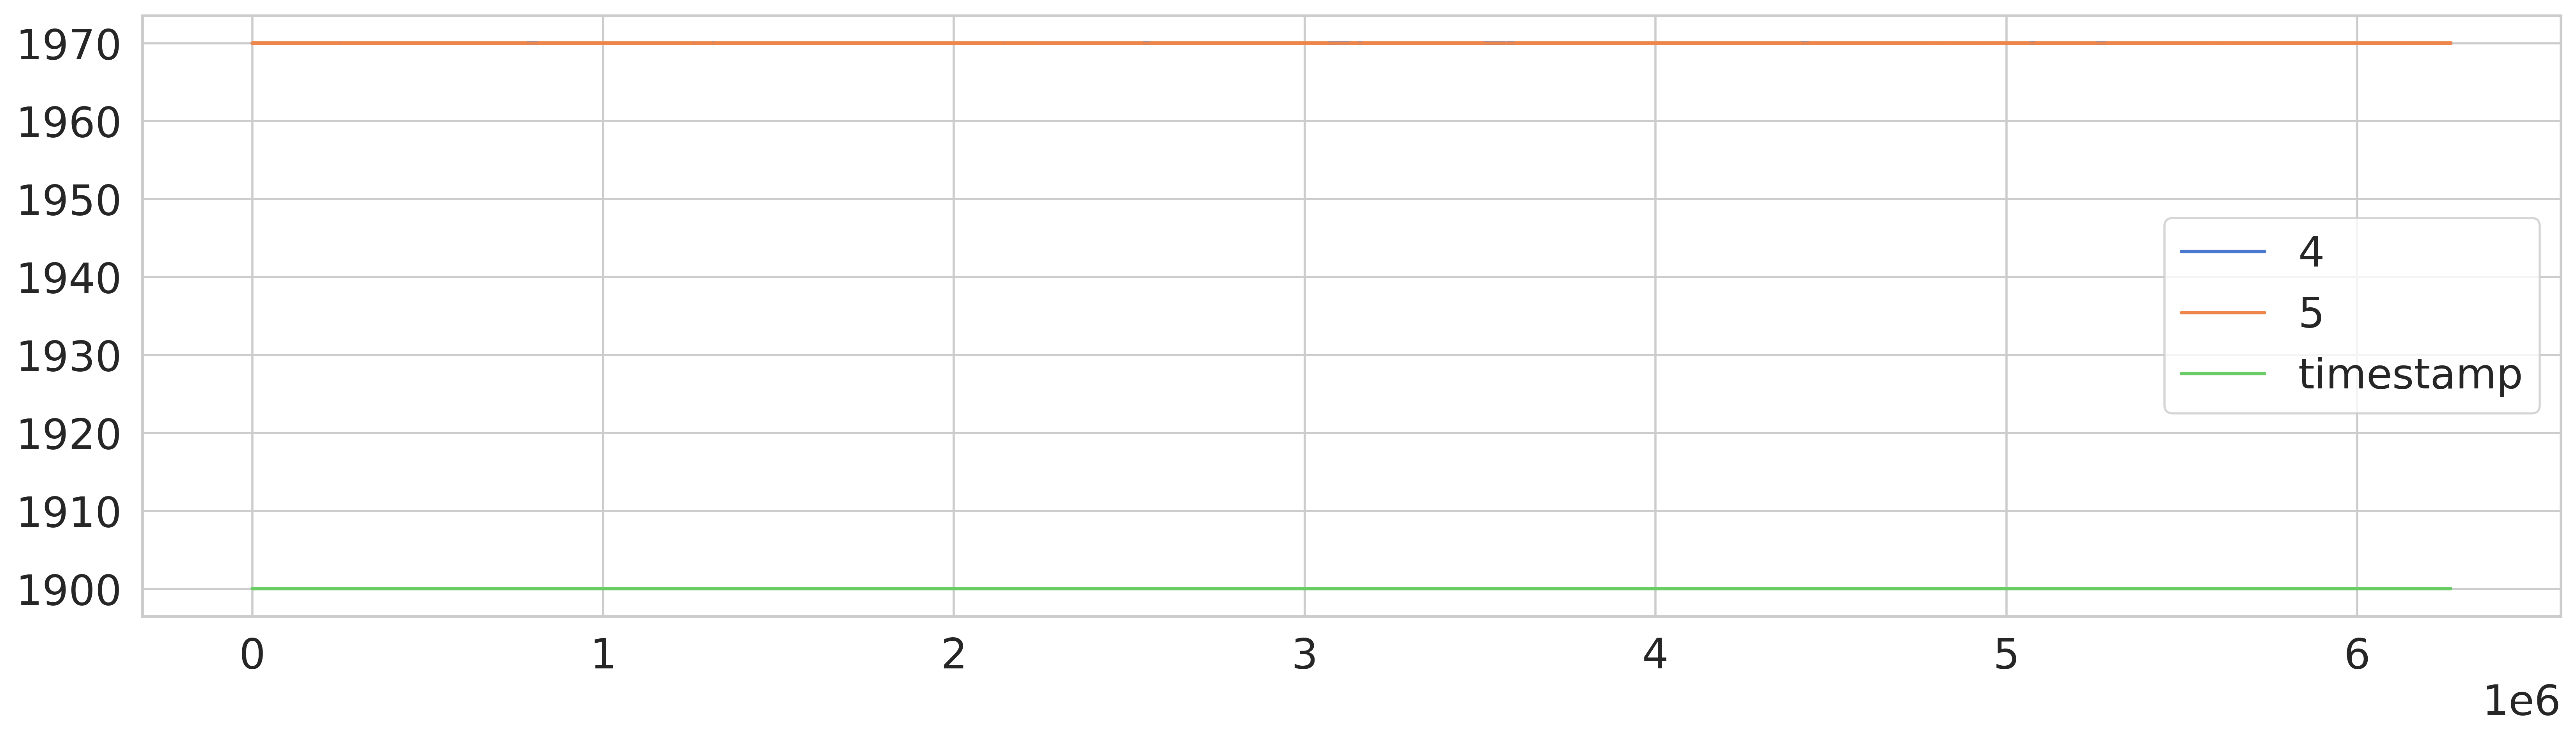

In [35]:
combined_csv_df.plot()

In [36]:
combined_csv_df

,4,5,timestamp
0,-0.070,-0.354,1900-01-01 09:02:51.775040
1,-0.571,-0.036,1900-01-01 09:02:51.775080
2,-0.660,0.413,1900-01-01 09:02:51.775120
3,-0.498,-0.043,1900-01-01 09:02:51.775160
4,-0.749,-0.354,1900-01-01 09:02:51.775200
...,...,...,...
6266875,-0.147,3.539,1900-01-01 15:50:41.874840
6266876,2.178,0.809,1900-01-01 15:50:41.874880
6266877,-0.268,-3.877,1900-01-01 15:50:41.874920
6266878,-1.258,-0.673,1900-01-01 15:50:41.874960


(raylet) [2023-08-01 16:10:37,491 E 1544473 1544473] (raylet) node_manager.cc:3084: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: ee5b862fdc7c322040063881870366481222745f6f0b2c51b5841d13, IP: 192.168.0.140) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.0.140`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [38]:
def process_data(combined_csv_df):
  # Step 1: Load and preprocess data
  combined_csv_df['timestamp'] = pd.to_datetime(combined_csv_df['timestamp'])
  combined_csv_df['timestamp'] = combined_csv_df['timestamp'].astype(np.int64)  # Convert to nanoseconds since the Unix epoch
  values = combined_csv_df['value'].values.reshape(-1, 1)

  # Normalize the 'timestamp' column
  scaler = MinMaxScaler()
  combined_csv_df['timestamp'] = scaler.fit_transform(combined_csv_df['timestamp'].values.reshape(-1, 1))

  # Step 2: Split data into training and test sets
  train_size = int(len(values) * 0.8)
  train_data, test_data = values[:train_size], values[train_size:]
  train_timestamps, test_timestamps = combined_csv_df['timestamp'][:train_size], combined_csv_df['timestamp'][train_size:]
  return train_data, test_data, train_timestamps, test_timestamps

def train(model, data):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(100):
        loss = 0
        for x, y, t in zip(train_data, train_timestamps, train_timestamps):
            output = model(x)
            loss += ((output - y)**2).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss)



In [47]:
combined_csv_df.columns = ['sensor_1', 'sensor_2', 'timestamp']

In [40]:
combined_csv_df

,sensor_1,sensor_2,time
0,-0.070,-0.354,1900-01-01 09:02:51.775040
1,-0.571,-0.036,1900-01-01 09:02:51.775080
2,-0.660,0.413,1900-01-01 09:02:51.775120
3,-0.498,-0.043,1900-01-01 09:02:51.775160
4,-0.749,-0.354,1900-01-01 09:02:51.775200
...,...,...,...
6266875,-0.147,3.539,1900-01-01 15:50:41.874840
6266876,2.178,0.809,1900-01-01 15:50:41.874880
6266877,-0.268,-3.877,1900-01-01 15:50:41.874920
6266878,-1.258,-0.673,1900-01-01 15:50:41.874960


In [41]:
combined_csv_df_train = combined_csv_df

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_csv_df_train['sensor_1'] = scaler.fit_transform(combined_csv_df['sensor_1'].values.reshape(-1, 1))
combined_csv_df_train['sensor_2'] = scaler.fit_transform(combined_csv_df['sensor_2'].values.reshape(-1, 1))

(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet)   Traceback (most recent call last):
(raylet)     File "/usr/lib/python3.10/site.py", line 192, in addpackage
(raylet)       exec(line)
(raylet)     File "<string>", line 1, in <module>
(raylet)     File "/home/i4624/.local/lib/python3.10/site-packages/pandas/__init__.py", line 16, in <module>
(raylet)       raise ImportError(
(raylet)   ImportError: Unable to import required dependencies:
(raylet)   pytz: No module named 'pytz'
(raylet) 
(raylet) Remainder of file ignored
(raylet)   Traceback 

(raylet) [2023-08-01 16:17:37,494 E 1544473 1544473] (raylet) node_manager.cc:3084: 35 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: ee5b862fdc7c322040063881870366481222745f6f0b2c51b5841d13, IP: 192.168.0.140) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.0.140`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [60]:
def process_data(data):
  # Step 1: Load and preprocess data
  data['timestamp'] = pd.to_datetime(data['timestamp'])
  data['timestamp'] = data['timestamp'].astype(np.int64)  # Convert to nanoseconds since the Unix epoch
  values = data[['sensor_1', 'sensor_2']].values.reshape(-1, 2)

  # Normalize the data
  scaler = MinMaxScaler()
  values = scaler.fit_transform(values)

  # Step 2: Convert data to PyTorch tensors
  train_data = torch.from_numpy(values[:int(len(values) * 0.8)])
  test_data = torch.from_numpy(values[int(len(values) * 0.8):])
  return train_data, test_data

In [61]:
def train(model, train_data, test_data):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(100):
        loss = 0
        for x, y in zip(train_data, train_data):
            output = model(x)
            loss += ((output - y)**2).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss)

In [46]:
combined_csv_df

,sensor_1,sensor_2,time
0,0.501547,0.508283,1900-01-01 09:02:51.775040
1,0.474824,0.516438,1900-01-01 09:02:51.775080
2,0.470077,0.527953,1900-01-01 09:02:51.775120
3,0.478718,0.516259,1900-01-01 09:02:51.775160
4,0.465330,0.508283,1900-01-01 09:02:51.775200
...,...,...,...
6266875,0.497440,0.608119,1900-01-01 15:50:41.874840
6266876,0.621453,0.538108,1900-01-01 15:50:41.874880
6266877,0.490986,0.417936,1900-01-01 15:50:41.874920
6266878,0.438180,0.500103,1900-01-01 15:50:41.874960


In [58]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(0)
        h0 = torch.zeros(1, hidden_size)
        c0 = torch.zeros(1, hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out

In [62]:
if __name__ == '__main__':
    train_data, test_data = process_data(combined_csv_df)
    model = LSTMModel(2, 10, 1)
    train(model, train_data, test_data)

(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) 
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) 
(raylet) Error processing line 1 of /home/i4624/.local/lib/python3.10/site-packages/modin-autoimport-pandas.pth:
(raylet) Error processing 

In [14]:
def plotting(test_timestamps,test_data, anomalies, checked, logscale, data_name):
  # Step 5: Create plot with marked anomalies
  plt.plot(test_timestamps, test_data, label='value')
  plt.scatter(np.take(test_timestamps, anomalies), np.take(test_data, anomalies), color='red', label='Anomaly')
  plt.scatter(np.take(test_timestamps, checked), np.take(test_data, checked), color='black', label='checked')
  plt.xlabel('timestamp')
  plt.ylabel('Value')
  if(logscale==1):
    plt.yscale('log')

  plt.title(data_name)

  plt.legend()
  plt.show()

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

def train(model, criterion, optimizer, train_loader, epochs):
    for epoch in range(epochs):
        for i, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_size = 10
    hidden_size = 20
    num_classes = 10

    model = LSTMModel(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loader = ...  # load the training data

    train(model, criterion, optimizer, train_loader, 10)